In [9]:
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
os.chdir('/home/javak/phasenet_chile-subduction-zone')
PROJECT_ROOT = os.getcwd()

In [10]:
# Load events catalog
os.chdir('/home/javak/Sample_data_chile')
CATALOG_ROOT = os.getcwd()
catalog_txt = pd.read_csv(os.path.join(CATALOG_ROOT, "Events_catalog/IPOC_2007_2020_picks.txt"), sep="\t")
export_fig_path ='/home/javak/Sample_data_chile/Comparing PhaseNet and real data/CX.PB11.D.2020.366'

In [11]:
picks_csv = pd.read_csv(os.path.join(PROJECT_ROOT, "results/picks.csv"), sep="\t")
picks_csv.loc[:, 'p_idx'] = picks_csv["p_idx"].apply(lambda x: x.strip("[]").split(","))
picks_csv.loc[:, 'p_prob'] = picks_csv["p_prob"].apply(lambda x: x.strip("[]").split(","))
picks_csv.loc[:, 's_idx'] = picks_csv["s_idx"].apply(lambda x: x.strip("[]").split(","))
picks_csv.loc[:, 's_prob'] = picks_csv["s_prob"].apply(lambda x: x.strip("[]").split(","))
print(picks_csv.iloc[0])
print(picks_csv)

fname                             CX.PB14.00.NEZ.D.2012.001
t0                                  2012-01-01T00:00:02.050
p_idx     [87354, 294206, 814039, 1565404, 1786234, 1821...
p_prob    [0.338, 0.318, 0.625, 0.470, 0.409, 0.939, 0.4...
s_idx     [96374, 241423, 278422, 294214, 514762, 539330...
s_prob    [0.410, 0.773, 0.667, 0.440, 0.304, 0.497, 0.5...
Name: 0, dtype: object
                       fname                       t0  \
0  CX.PB14.00.NEZ.D.2012.001  2012-01-01T00:00:02.050   

                                               p_idx  \
0  [87354, 294206, 814039, 1565404, 1786234, 1821...   

                                              p_prob  \
0  [0.338, 0.318, 0.625, 0.470, 0.409, 0.939, 0.4...   

                                               s_idx  \
0  [96374, 241423, 278422, 294214, 514762, 539330...   

                                              s_prob  
0  [0.410, 0.773, 0.667, 0.440, 0.304, 0.497, 0.5...  


In [12]:
with open(os.path.join(PROJECT_ROOT, "results/picks.json")) as fp:
    picks_json = json.load(fp)  
#print(picks_json[0])

In [13]:
# convert jason to data frame
df = pd.DataFrame.from_dict(pd.json_normalize(picks_json), orient='columns')
df_p_waves = df[df["type"] == 'p']
#df_p_waves = df_p_waves.sort_values('timestamp')
df_s_waves = df[df["type"] == 's']

In [14]:
df_p_waves.iloc[0:10]


,id,timestamp,prob,type
0,CX.PB14.00.NEZ.D.2012.001,2012-01-01T00:14:35.590,0.337733,p
1,CX.PB14.00.NEZ.D.2012.001,2012-01-01T00:49:04.110,0.318300,p
2,CX.PB14.00.NEZ.D.2012.001,2012-01-01T02:15:42.440,0.625280,p
3,CX.PB14.00.NEZ.D.2012.001,2012-01-01T04:20:56.090,0.470241,p
4,CX.PB14.00.NEZ.D.2012.001,2012-01-01T04:57:44.390,0.408689,p
5,CX.PB14.00.NEZ.D.2012.001,2012-01-01T05:03:32.280,0.939276,p
6,CX.PB14.00.NEZ.D.2012.001,2012-01-01T06:45:37.990,0.400704,p
7,CX.PB14.00.NEZ.D.2012.001,2012-01-01T06:55:38.890,0.308798,p
8,CX.PB14.00.NEZ.D.2012.001,2012-01-01T07:05:34.430,0.483796,p
9,CX.PB14.00.NEZ.D.2012.001,2012-01-01T07:07:47.600,0.606953,p


In [15]:
df_s_waves.iloc[0:10]

,id,timestamp,prob,type
27,CX.PB14.00.NEZ.D.2012.001,2012-01-01T00:16:05.790,0.409969,s
28,CX.PB14.00.NEZ.D.2012.001,2012-01-01T00:40:16.280,0.772909,s
29,CX.PB14.00.NEZ.D.2012.001,2012-01-01T00:46:26.270,0.667264,s
30,CX.PB14.00.NEZ.D.2012.001,2012-01-01T00:49:04.190,0.439953,s
31,CX.PB14.00.NEZ.D.2012.001,2012-01-01T01:25:49.670,0.304160,s
32,CX.PB14.00.NEZ.D.2012.001,2012-01-01T01:29:55.350,0.496779,s
33,CX.PB14.00.NEZ.D.2012.001,2012-01-01T01:30:32.660,0.579036,s
34,CX.PB14.00.NEZ.D.2012.001,2012-01-01T01:51:11.770,0.312485,s
35,CX.PB14.00.NEZ.D.2012.001,2012-01-01T02:14:32.910,0.322610,s
36,CX.PB14.00.NEZ.D.2012.001,2012-01-01T02:16:18.060,0.784348,s


# Read data using obspy

In [16]:
import obspy
streamZ = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CX.PB01..HHE.D.2020.366"), sep="\t")
streamN = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CX.PB01..HHN.D.2020.366"), sep="\t")
streamE = obspy.read(os.path.join(CATALOG_ROOT, "mseed/CX.PB01..HHZ.D.2020.366"), sep="\t")
start=obspy.UTCDateTime("2020-12-31T08:53:17.480000Z")
dt = 2000
streamZ = streamZ.slice (start,start+dt)
streamN = streamN.slice (start,start+dt)
streamE = streamE.slice (start,start+dt)
streamZ.filter('bandpass', freqmin= 1, freqmax=20)
streamN.filter('bandpass', freqmin= 1, freqmax=20)
streamE.filter('bandpass', freqmin= 1, freqmax=20)



FileNotFoundError: [Errno 2] No such file or directory: '/home/javak/Sample_data_chile/mseed/CX.PB01..HHE.D.2020.366'

In [ ]:
mask_p = (df_p_waves['timestamp']> streamN[0].stats.starttime) & (df_p_waves['timestamp']<streamN[0].stats.starttime+dt)
mask_s = (df_s_waves['timestamp']> streamN[0].stats.starttime) & (df_s_waves['timestamp']<streamN[0].stats.starttime+dt)

new_df_p_waves = df_p_waves.loc[mask_p]
new_df_s_waves = df_s_waves.loc[mask_s]
new_df_s_waves

,id,timestamp,prob,type
377,CX.PB01..HHZ.D.2020.366,2020-12-31T08:55:52.398,0.313324,s
378,CX.PB01..HHZ.D.2020.366,2020-12-31T08:58:17.878,0.446114,s
379,CX.PB01..HHZ.D.2020.366,2020-12-31T09:04:48.328,0.509039,s
380,CX.PB01..HHZ.D.2020.366,2020-12-31T09:06:29.638,0.551213,s
381,CX.PB01..HHZ.D.2020.366,2020-12-31T09:13:12.858,0.308476,s
382,CX.PB01..HHZ.D.2020.366,2020-12-31T09:18:30.718,0.520337,s
383,CX.PB01..HHZ.D.2020.366,2020-12-31T09:21:03.928,0.694832,s
384,CX.PB01..HHZ.D.2020.366,2020-12-31T09:23:30.258,0.761748,s
855,CX.PB01..HHN.D.2020.366,2020-12-31T08:53:41.408,0.336550,s
856,CX.PB01..HHN.D.2020.366,2020-12-31T08:54:58.978,0.342516,s


In [ ]:
#new_df_p_waves['id'].iloc[3]=='CX.PB01..HHE.D.2020.366'
obspy.UTCDateTime(df_sub_p['picks_time'][t].matplotlib_date for t in range(0, df_sub_p['picks_time'].shape[0]))

False

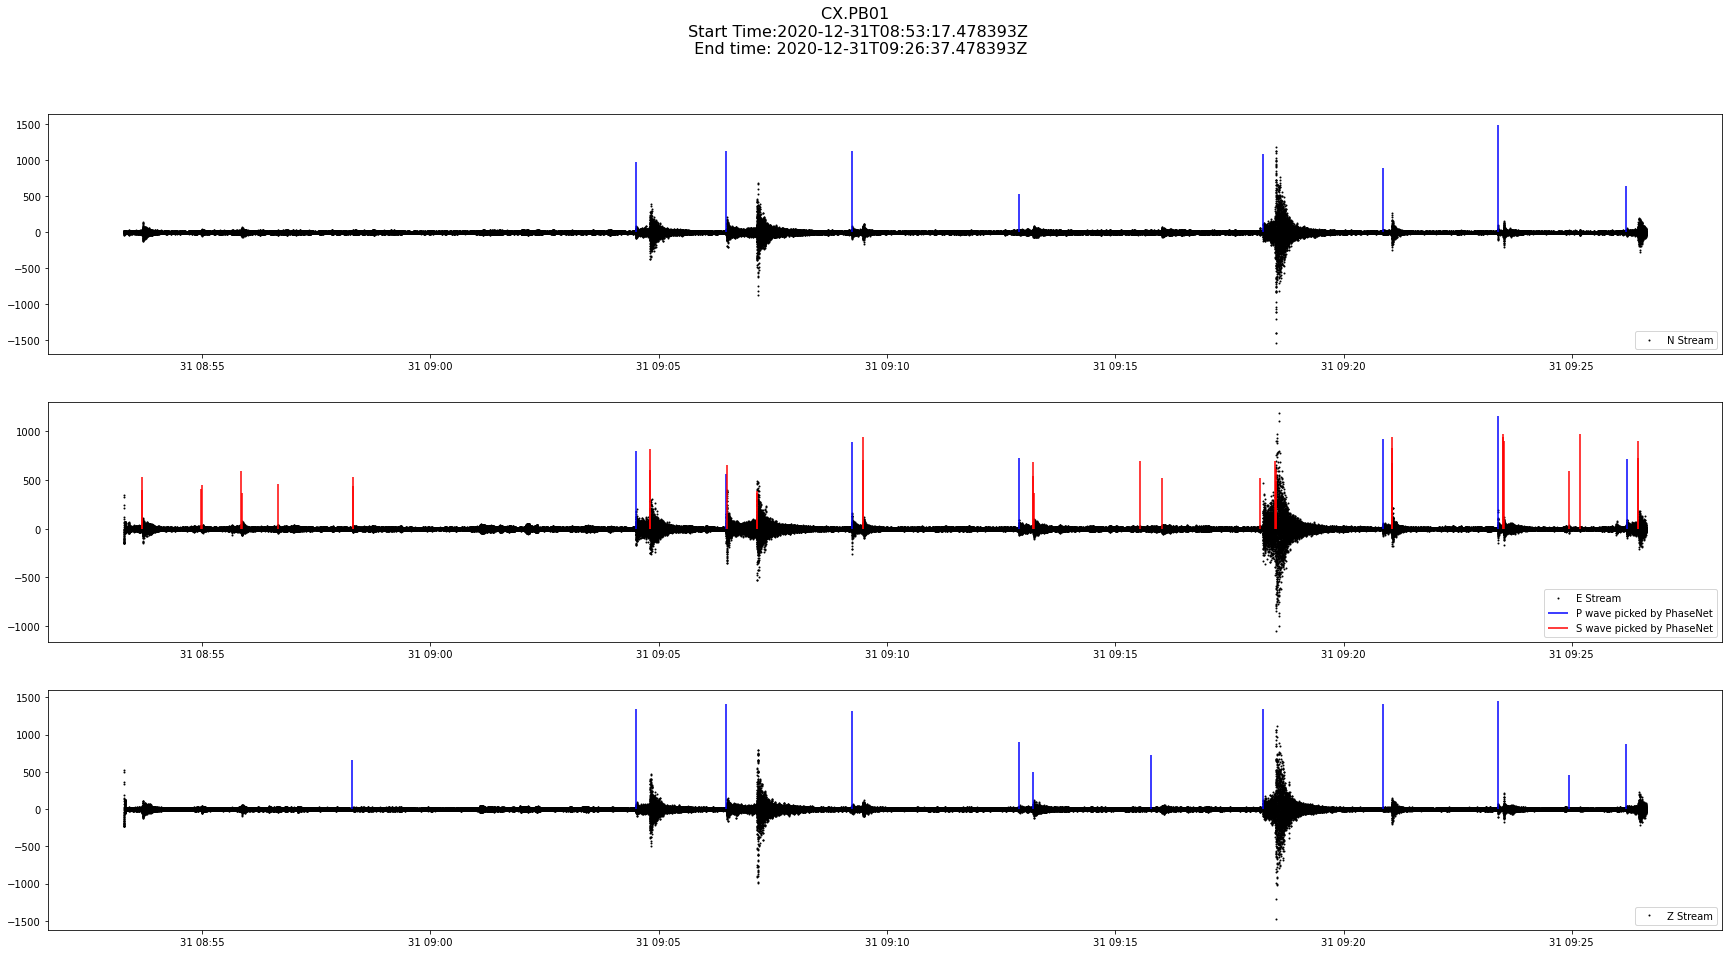

In [ ]:
# plot
streamN[0].stats.starttime
fig, ax = plt.subplots(3,1,figsize=(30,15))
ax[0].plot_date([streamN[0].stats.starttime + t for t in streamN[0].times()], streamN[0].data, markersize=1, label = 'N Stream', color = 'k')
ax[1].plot_date([streamE[0].stats.starttime + t for t in streamE[0].times()], streamE[0].data, markersize=1, label = 'E Stream', color = 'k')
ax[2].plot_date([streamZ[0].stats.starttime + t for t in streamZ[0].times()], streamZ[0].data, markersize=1, label = 'Z Stream', color = 'k')

fig.suptitle("{0}.{1} \n Start Time:{2} \n End time: {3}".format(streamN[0].stats.network,streamN[0].stats.station, streamN[0].stats.starttime, streamN[0].stats.endtime),
             fontsize = 16)

for i in range (0,new_df_p_waves.shape[0]):
    if i < new_df_p_waves.shape[0]-1:
        if new_df_p_waves['id'].iloc[i] == 'CX.PB01..HHN.D.2020.366':
            ax[0].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(streamN.max()[0])*new_df_p_waves['prob'].iloc[i], color='b', linestyle='solid')
        elif new_df_p_waves['id'].iloc[i] == 'CX.PB01..HHE.D.2020.366':
            ax[1].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(streamE.max()[0])*new_df_p_waves['prob'].iloc[i], color='b', linestyle='solid')
        else:
            ax[2].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(streamZ.max()[0])*new_df_p_waves['prob'].iloc[i], color='b', linestyle='solid')
    else:
        if new_df_p_waves['id'].iloc[i] == 'CX.PB01..HHN.D.2020.366':
            ax[0].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(streamN.max()[0])*new_df_p_waves['prob'].iloc[i],label = 'P wave picked by PhaseNet', color='b', linestyle='solid')
        elif new_df_p_waves['id'].iloc[i] == 'CX.PB01..HHE.D.2020.366':
            ax[1].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(streamE.max()[0])*new_df_p_waves['prob'].iloc[i],label = 'P wave picked by PhaseNet', color='b', linestyle='solid')
        else:
            ax[2].vlines(x=pd.Timestamp(new_df_p_waves['timestamp'].iloc[i]), ymin=0, ymax=abs(streamZ.max()[0])*new_df_p_waves['prob'].iloc[i],label = 'P wave picked by PhaseNet', color='b', linestyle='solid')        

for j in range (0,new_df_s_waves.shape[0]):
    if j < new_df_s_waves.shape[0]-1:
        if new_df_s_waves['id'].iloc[i] == 'CX.PB01..HHN.D.2020.366':
            ax[0].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(streamN.max()[0])*new_df_s_waves['prob'].iloc[j], color='red',linestyle='solid')
        elif new_df_s_waves['id'].iloc[i] == 'CX.PB01..HHE.D.2020.366':
            ax[1].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(streamE.max()[0])*new_df_s_waves['prob'].iloc[j], color='red',linestyle='solid')
        else:
            ax[2].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(streamZ.max()[0])*new_df_s_waves['prob'].iloc[j], color='red',linestyle='solid')
    else:
        if new_df_s_waves['id'].iloc[i] == 'CX.PB01..HHN.D.2020.366':
            ax[0].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(streamN.max()[0])*new_df_s_waves['prob'].iloc[j], label = 'S wave picked by PhaseNet', color='red',linestyle='solid')
        elif new_df_s_waves['id'].iloc[i] == 'CX.PB01..HHE.D.2020.366':
            ax[1].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(streamE.max()[0])*new_df_s_waves['prob'].iloc[j], label = 'S wave picked by PhaseNet', color='red',linestyle='solid')
        else:
            ax[2].vlines(x=pd.Timestamp(new_df_s_waves['timestamp'].iloc[j]), ymin=0, ymax=abs(streamZ.max()[0])*new_df_s_waves['prob'].iloc[j], label = 'S wave picked by PhaseNet', color='red',linestyle='solid')

ax[0].legend(loc='lower right')
ax[1].legend(loc='lower right')
ax[2].legend(loc='lower right')


file_name = '{0}.{extention}'.format(streamN[0].stats.starttime, extention='png')
fig.savefig(os.path.join(export_fig_path, file_name), facecolor = 'w')


In [ ]:
streamN[0].stats

         network: CX
         station: PB01
        location: 
         channel: HHN
       starttime: 2020-12-31T08:53:17.478393Z
         endtime: 2020-12-31T09:26:37.478393Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 200001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 13287, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 6802944})
      processing: ['ObsPy 1.2.2: trim(endtime=UTCDateTime(2020, 12, 31, 9, 26, 37, 480000)::fill_value=None::nearest_sample=True::pad=False::starttime=UTCDateTime(2020, 12, 31, 8, 53, 17, 480000))', "ObsPy 1.2.2: filter(options={'freqmin': 1, 'freqmax': 20}::type='bandpass')"]